Name: Luzyannet Ballesteros 

Labpartner(s): Paola 

In [88]:
#import statements go here
import pandas as pd
from scipy import stats
import numpy as np

# Class 12.2

# Warmups 11.2

**W.1.** In the scipy lecture notes on statistics go through **Section 3.1.2 Hypothesis testing: comparing two groups** tutorial. Make sure to read up about t-tests and the rest if you are not familiar with these statistical methods.
https://scipy-lectures.org/packages/statistics/index.html#id13

Note you will need to load in the dataset on brains at the beginning of the section

It is suggested you do the rest of the 3.1 section for practice this week. Most of it is review, some of it is new and useful for you all.

In [2]:
w1 = pd.read_csv('brain_size.csv', sep=';', na_values=".") ## uploaded data as pd

In [3]:
w1

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


In [4]:
Female = w1[w1['Gender'] == 'Female']['VIQ']
Male = w1[w1['Gender'] == 'Male']['VIQ']

In [5]:
Male

1     150
2     123
3     129
8      93
9     114
11    150
12    129
17     96
19     77
20     83
21    107
23    145
25    145
27     96
31    145
32     96
33     96
36    150
38     90
39     91
Name: VIQ, dtype: int64

In [6]:
Female 

0     132
4     132
5      90
6     136
7      90
10    129
13    120
14    100
15     71
16    132
18    112
22    129
24     86
26     90
28     83
29    126
30    126
34     90
35    129
37     86
Name: VIQ, dtype: int64

In [7]:
stats.ttest_ind(Female, Male)

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

In [8]:
## you can also choose other columns 
Female_MRI = w1[w1['Gender'] == 'Female']['MRI_Count']
Male_MRI = w1[w1['Gender'] == 'Male']['MRI_Count']
stats.ttest_ind(Female_MRI, Male_MRI)

Ttest_indResult(statistic=-5.215594290396395, pvalue=6.757994867071175e-06)

# Lecture 12.2

### Agenda:


Some useful things to do with a timeseries
- datetime objects
- moving averages
- detrending

#### Datetime Objects in python and pandas

Python has a wonderful feature called datetime objects. These are super-useful if you are dealing with any data that has a timestamp. They are a bit tricky to get used to, but worth the effort, and the alternatives are usually much more painful (trust me on this one). 

Documentation: 
- https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
- https://docs.python.org/3/library/datetime.html

There is a lot you can do with these. Here we will just cover the basics. Dig in to the documentation if you need something specfic.

Note that Victoria used these in her sample code to make movie frames for HYCOM data: https://github.com/chsharrison/IntroSciComp_S2021/blob/main/Class_materials/Hycom-CartopyDemo%20-%20updated.ipynb

In [9]:
from datetime import datetime, timedelta
import pandas as pd

#### Defining a specfic date

In [10]:
date1 = datetime(1996,1,1) 

In [11]:
# this is a datetime object
date1

datetime.datetime(1996, 1, 1, 0, 0)

In [12]:
# print out the date
print(date1)

1996-01-01 00:00:00


In [13]:
# you can also format the date as a string however you like (useful for plots)
date1.strftime("%m/%d/%Y")

'01/01/1996'

In [14]:
# defining a date with hours, minutes and seconds
date2 = datetime(1996,1,1, 13, 34, 6) # note using 24 clock (miltary time) here

In [15]:
print(date2)

1996-01-01 13:34:06


In [16]:
#what is going to happen here?
date2.strftime("%m-%d-%Y")

'01-01-1996'

In [17]:
date1.today() #somehow it knows what timezone I am (probably from my computer)

datetime.datetime(2021, 4, 11, 16, 32, 11, 529125)

#### If we want to increment the date we can use timedelta

In [18]:
date1 = date1 + timedelta(days=1)
print(date1)

1996-01-02 00:00:00


In [19]:
date1 = date1 + timedelta(minutes = 2, seconds=1)
print(date1)

1996-01-02 00:02:01


In [20]:
# you can also do things like add fractional days
date1 = date1 + timedelta(days=1.5)
print(date1)

1996-01-03 12:02:01


We can find the time difference between two dates

In [21]:
timediff = date2-date1
timediff

datetime.timedelta(days=-2, seconds=5525)

#### We can also define timeseries using pandas 

In [22]:
pd.date_range?

In [93]:
# note the default is daily
my_daterange = pd.date_range(start='1/1/2018', end='1/08/2018')

In [94]:
my_daterange

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

In [95]:
# this can be indexed like any array
my_daterange[0]
# note the result is a timestamp, which is similar to a datetime object, but not exactly

Timestamp('2018-01-01 00:00:00', freq='D')

In [96]:
print(my_daterange[1])

2018-01-02 00:00:00


In [97]:
# you can convert a datetime to a timestamp
pd.Timestamp(datetime(2012, 5, 1))

Timestamp('2012-05-01 00:00:00')

In [98]:
# we can also specfiy the frequency
my_daterange2 = pd.date_range(start='1/1/2018',end = '1/1/2021', freq='M')
my_daterange2

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')

See the documentation for lots more functionality

### Working with timeseries data: global sea surface temperature (SST)

We are going to be using some data from the epa website here: https://www.epa.gov/climate-indicators/climate-change-indicators-sea-surface-temperature

This is globally averaged Extended Reconstructed Sea Surface Temperature (ERSST)v.4 from NOAA, which combines satilite, ship and other in situ (in place, i.e. in the water) data. If you follow the links on the above you can get the gridded (i.e. map) product in netcdf format for the latest product (v.5). We are just going to play around with the globally averaged data

In [ ]:
sst= pd.read_csv('https://www.epa.gov/sites/production/files/2016-08/sea-surface-temp_fig-1.csv')

In [25]:
sst= pd.read_csv('https://www.epa.gov/sites/production/files/2016-08/sea-surface-temp_fig-1.csv',
                encoding = 'latin1')

In [101]:
sst

,"Figure 1. Average Global Sea Surface Temperature, 1880-2015",Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Source: EPA's Climate Change Indicators in the...,NaN,NaN,NaN
1,"Data source: NOAA, 2016",NaN,NaN,NaN
2,Web update: August 2016,NaN,NaN,NaN
3,Units: temperature anomaly (°F),NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
137,2011,0.4286736,0.13328918,0.72405802
138,2012,0.528696,0.232869466,0.824522534
139,2013,0.5846742,0.28922658,0.88012182
140,2014,0.7512552,0.45580758,1.04670282


In [26]:
sst= pd.read_csv('https://www.epa.gov/sites/production/files/2016-08/sea-surface-temp_fig-1.csv',
                 index_col = 0, # this makes the year the index
                  header = 6,
                 #skiprows = [0,1,2,3,4,5], # this works too, need to skip all the comments
                 encoding ='latin1' # had to do this to get it to work, thanks stack exchange
                )

In [103]:
sst

,Annual anomaly,Lower 95% confidence interval,Upper 95% confidence interval
Year,,,
1880,-0.470009,-0.672646,-0.267371
1881,-0.356879,-0.560588,-0.153169
1882,-0.372661,-0.575728,-0.169594
1883,-0.448443,-0.650804,-0.246082
1884,-0.589754,-0.790478,-0.389030
...,...,...,...
2011,0.428674,0.133289,0.724058
2012,0.528696,0.232869,0.824523
2013,0.584674,0.289227,0.880122


<AxesSubplot:xlabel='Year'>

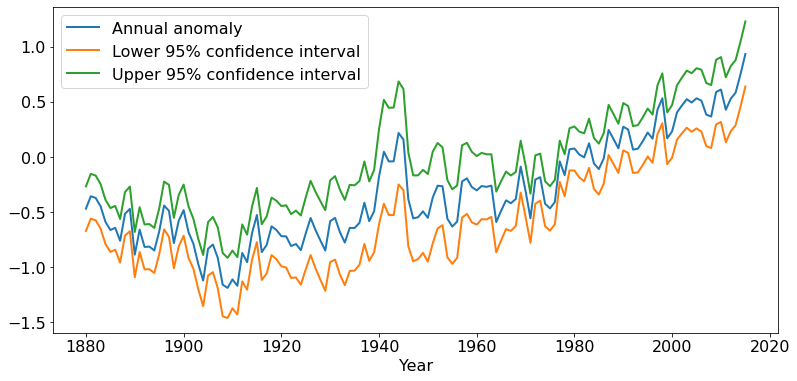

In [104]:
sst.plot()

In [105]:
#Set plotting formats
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [13.0, 6.0]
mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth'] = 2.0

<AxesSubplot:xlabel='Year'>

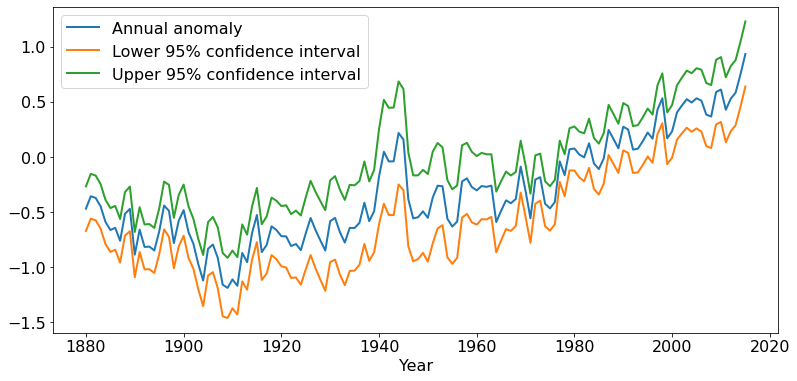

In [106]:
sst.plot()

1850 is usually considered the beginning of the industrial revolution, so before human affected climate by burning fossil fuels (but we did major land use changes and had impacts on many species' extinctions)

There is a definate trend in the data, with a big excursion in the 1940s

Let's ask some research questions. We will start these in lecture and you will finish them in lab:
- What is the trend in this data, that is how fast is SST increasing with time? 
- If we choose a different window for the trend analysis, how does this affect the answer?
- What causes all the interannual variablilty? If we detrend the data how does it look? Can we compare this with climate variabiltiy indices?
- What happened in the 1940s?

see: https://www.newscientist.com/article/dn11639-climate-myths-the-cooling-after-1940-shows-co2-does-not-cause-warming/

I am much more comfortable doing data analysis in xarray so I'm converting the pandas dataframe to an xarray dataset

In [105]:
import xarray as xr

In [106]:
sst_ds = sst.to_xarray()

In [107]:
sst_ds

<xarray.Dataset>
Dimensions:                        (Year: 136)
Coordinates:
  * Year                           (Year) int64 1880 1881 1882 ... 2014 2015
Data variables:
    Annual anomaly                 (Year) float64 -0.47 -0.3569 ... 0.9356
    Lower 95% confidence interval  (Year) float64 -0.6726 -0.5606 ... 0.6401
    Upper 95% confidence interval  (Year) float64 -0.2674 -0.1532 ... 1.231

If we want, we can add a pandas date range to this timeseries and use this for plotting. Not super needed here because it's annual, but would be useful if it was monthly or daily.

In [108]:
ssha_dates = pd.date_range(start = '1880', end = '2015', freq='Y')

In [109]:
ssha_dates

DatetimeIndex(['1880-12-31', '1881-12-31', '1882-12-31', '1883-12-31',
               '1884-12-31', '1885-12-31', '1886-12-31', '1887-12-31',
               '1888-12-31', '1889-12-31',
               ...
               '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31',
               '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31',
               '2013-12-31', '2014-12-31'],
              dtype='datetime64[ns]', length=135, freq='A-DEC')

In [110]:
# let's just work with the annual anomaly

sst_ds["Annual anomaly"] # note a lot of the syntax in xarray is similar to pandas

<xarray.DataArray 'Annual anomaly' (Year: 136)>
array([-0.4700088, -0.3568788, -0.3726612, -0.448443 , -0.5897538,
       -0.6636546, -0.6439392, -0.7616232, -0.5166342, -0.4717926,
       -0.8875836, -0.6603264, -0.8173098, -0.8148276, -0.84978  ,
       -0.6772536, -0.4412844, -0.4894326, -0.78255  , -0.578736 ,
       -0.4833054, -0.6831072, -0.7883226, -0.9732618, -1.123038 ,
       -0.8347986, -0.795843 , -0.917685 , -1.160703 , -1.189773 ,
       -1.112769 , -1.1706066, -0.8718498, -0.9557658, -0.6931926,
       -0.5274864, -0.8644752, -0.7996338, -0.6306858, -0.6633414,
       -0.7196544, -0.7222464, -0.8093034, -0.7910208, -0.8465382,
       -0.6946722, -0.554238 , -0.6640884, -0.7589772, -0.8502282,
       -0.5835816, -0.5537106, -0.683568 , -0.7777674, -0.6447312,
       -0.6452784, -0.5988258, -0.4155462, -0.5834772, -0.4924098,
       -0.1797678,  0.0471582, -0.0406296, -0.039807 ,  0.2180826,
        0.157752 , -0.3853548, -0.5579568, -0.5477346, -0.4941792,
       -0.5531796, -0.368496 , -0.2612952, -0.2661372, -0.5613282,
       -0.632412 , -0.5871312, -0.2226618, -0.1943208, -0.2735424,
       -0.3035772, -0.2642508, -0.2717028, -0.260397 , -0.5913306,
       -0.489249 , -0.39411  , -0.4203576, -0.38187  , -0.0876366,
       -0.3086334, -0.5571756, -0.2051676, -0.1836738, -0.4251924,
       -0.4675428, -0.4096278, -0.0397692, -0.165393 ,  0.0692586,
        0.0771966,  0.0219924, -0.0032202,  0.1239354, -0.0596304,
       -0.109917 , -0.0137916,  0.2456388,  0.1634436,  0.0785898,
        0.274842 ,  0.2497932,  0.0669942,  0.0748224,  0.1436454,
        0.2219328,  0.1661922,  0.428193 ,  0.5327244,  0.1698606,
        0.2325024,  0.4042188,  0.4671414,  0.5250798,  0.4946364,
        0.5327874,  0.5114556,  0.3846042,  0.3673116,  0.5894424,
        0.6127182,  0.4286736,  0.528696 ,  0.5846742,  0.7512552,
        0.935577 ])
Coordinates:
  * Year     (Year) int64 1880 1881 1882 1883 1884 ... 2011 2012 2013 2014 2015

#### Let's do a linear fit of the whole timeseries

In [102]:
from scipy import stats

In [111]:
# the syntax for this function is x,y, so time, ssta
ssta_trend_entire = stats.linregress(sst_ds.Year, sst_ds["Annual anomaly"])

In [115]:
ssta_trend_entire

LinregressResult(slope=0.010013503267496782, intercept=-19.822035179626454, rvalue=0.8362694544139663, pvalue=8.796275453011977e-37, stderr=0.0005671794277975704)

In [116]:
ssta_trend_entire.slope

0.010013503267496782

The value I am interested in is the slope, what is this? What are the units?
- Rate that temperature is increasing (degrees F/Year)

Let's plot the line to see the fit. The equation is y = mx + b, where m is the slope and b is the intercept, what are x and y in this case?
- x is time
- y is temprature

In [100]:
import matplotlib.pyplot as plt

In [101]:
plt.plot(sst_ds.Year, sst_ds["Annual anomaly"])
plt.plot(sst_ds.Year, ssta_trend_entire.slope*sst_ds.Year + ssta_trend_entire.intercept)
plt.xlabel('Year')
plt.ylabel('SSTA ($\degree$F)')

NameError: name 'sst_ds' is not defined

How good of a fit is this for the last few decades?
It's not so good, the trend is faster, steeper

#### Let's do a linear fit for the last few decades and see what we get.

How do we access the later data?

In [120]:
sst_ds.Year[100:]

<xarray.DataArray 'Year' (Year: 36)>
array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])
Coordinates:
  * Year     (Year) int64 1980 1981 1982 1983 1984 ... 2011 2012 2013 2014 2015

In [121]:
sst_ds["Annual anomaly"][100:]

<xarray.DataArray 'Annual anomaly' (Year: 36)>
array([ 0.0771966,  0.0219924, -0.0032202,  0.1239354, -0.0596304,
       -0.109917 , -0.0137916,  0.2456388,  0.1634436,  0.0785898,
        0.274842 ,  0.2497932,  0.0669942,  0.0748224,  0.1436454,
        0.2219328,  0.1661922,  0.428193 ,  0.5327244,  0.1698606,
        0.2325024,  0.4042188,  0.4671414,  0.5250798,  0.4946364,
        0.5327874,  0.5114556,  0.3846042,  0.3673116,  0.5894424,
        0.6127182,  0.4286736,  0.528696 ,  0.5846742,  0.7512552,
        0.935577 ])
Coordinates:
  * Year     (Year) int64 1980 1981 1982 1983 1984 ... 2011 2012 2013 2014 2015

In [122]:
# the syntax for this function is x,y, so time, ssta
ssta_trend_1980_on = stats.linregress(sst_ds.Year[100:], sst_ds["Annual anomaly"][100:])

In [123]:
ssta_trend_1980_on

LinregressResult(slope=0.020711260308880312, intercept=-41.05951991698843, rvalue=0.8829830021529423, pvalue=1.0383113887943804e-12, stderr=0.0018882626420977894)

In [124]:
ssta_trend_1980_on.slope # 0.02 F/ year. 0.2 F /10 years

0.020711260308880312

Text(0, 0.5, 'SSTA ($\\degree$F)')

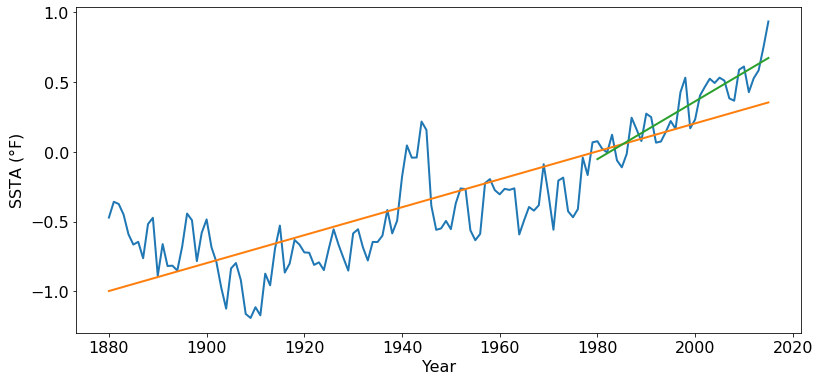

In [125]:
plt.plot(sst_ds.Year, sst_ds["Annual anomaly"])
plt.plot(sst_ds.Year, ssta_trend_entire.slope*sst_ds.Year + ssta_trend_entire.intercept)
plt.plot(sst_ds.Year[100:], ssta_trend_1980_on.slope*sst_ds.Year[100:] + ssta_trend_1980_on.intercept)
plt.xlabel('Year')
plt.ylabel('SSTA ($\degree$F)')

#### Detrending the data
Let's say we were interested in the variability outside of the trend. How do we detrend the data?

In [126]:
trend_entire = ssta_trend_entire.slope*sst_ds.Year + ssta_trend_entire.intercept


In [127]:
sst_detrended = sst_ds["Annual anomaly"] - trend_entire

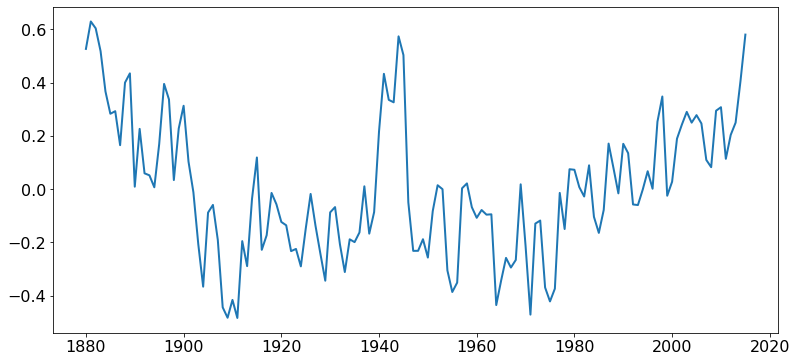

In [128]:
plt.plot(sst_ds.Year, sst_detrended)

#### Creating a moving average, i.e. filtering or smoothing.
Let's say we wanted to smooth the data to remove some of the variability, how would we do this?

I want to do a three year running mean, so for each datapoint, average the year before, the current year and the year after and save that to the current year as the new data.

if i is my current year index

(data[j+1] + data [j] + data [j-1])/3 to average the three years of data

Going to have to start at the second year, since I don't have a previous year


pseudo code:

create an array to save the new data in

Loop through all the years
 take a mean of the current, previous and next years, save to some new arrray


In [129]:
import numpy as np

In [130]:
sst_ds["Annual anomaly"].shape

(136,)

In [131]:
# initialize my array
ssta_filtered = np.zeros(136)

for i in range(134): # loop through all the years, skip the last index
    #print(i+1) #skip the first index
    ssta_filtered[i+1] = (sst_ds["Annual anomaly"][i] + sst_ds["Annual anomaly"][i+1] + sst_ds["Annual anomaly"][i+2])/3


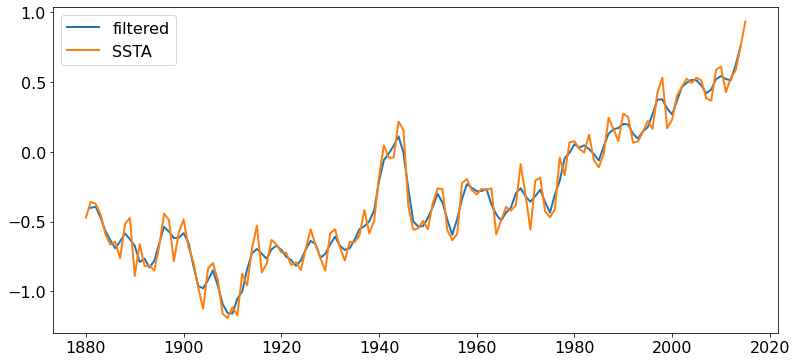

In [132]:
plt.plot(sst_ds.Year[1:-1],ssta_filtered[1:-1], label = "filtered")
plt.plot(sst_ds.Year,sst_ds["Annual anomaly"], label = 'SSTA')
plt.legend()

# Lab 12.2

**E.1** Define a datetime object that is your birthday. Increment this date using timedelta by a) ten weeks, b) five minutes, c) two years (tricky!) Hint: see help(timedelta)

In [30]:
#Defining datetime object 
birthday=datetime(1997,10,13)
birthday

datetime.datetime(1997, 10, 13, 0, 0)

In [31]:
birthday=birthday+timedelta(weeks=10)
birthday

datetime.datetime(1997, 12, 22, 0, 0)

In [33]:
birthday=birthday+timedelta(minutes=5)
birthday

datetime.datetime(1997, 12, 22, 0, 5)

In [34]:
timedelta?

In [35]:
#by two years convert years to days
birthday=birthday+timedelta(days=730)
birthday

datetime.datetime(1999, 12, 22, 0, 5)

**E.2** Define a daterange for your birthday every year of your life

In [37]:
ev_life = pd.date_range(start='10/13/1997', end='4/11/2021', freq=pd.DateOffset(years=1))

In [38]:
ev_life

DatetimeIndex(['1997-10-13', '1998-10-13', '1999-10-13', '2000-10-13',
               '2001-10-13', '2002-10-13', '2003-10-13', '2004-10-13',
               '2005-10-13', '2006-10-13', '2007-10-13', '2008-10-13',
               '2009-10-13', '2010-10-13', '2011-10-13', '2012-10-13',
               '2013-10-13', '2014-10-13', '2015-10-13', '2016-10-13',
               '2017-10-13', '2018-10-13', '2019-10-13', '2020-10-13'],
              dtype='datetime64[ns]', freq='<DateOffset: years=1>')

In [39]:
ev_life[4] ### ooh it worked ! 

Timestamp('2001-10-13 00:00:00', freq='<DateOffset: years=1>')

**E.3** Print all your birthdays out as month, day, year (no minutes, etc)

In [40]:
i=0
for a in ev_life: 
    print(ev_life[i].strftime("%m/%d/%Y")) 
    i=i+1

10/13/1997
10/13/1998
10/13/1999
10/13/2000
10/13/2001
10/13/2002
10/13/2003
10/13/2004
10/13/2005
10/13/2006
10/13/2007
10/13/2008
10/13/2009
10/13/2010
10/13/2011
10/13/2012
10/13/2013
10/13/2014
10/13/2015
10/13/2016
10/13/2017
10/13/2018
10/13/2019
10/13/2020


**E.4** Go through the tutorial on datetimes in pandas here: https://towardsdatascience.com/working-with-datetime-in-pandas-dataframe-663f7af6c587 Type in all the examples here in the lab.

In [59]:
# Converting strings to datetime
df1= pd.DataFrame({'date': ['3/10/2000', '3/11/2000', '3/12/2000'], 'value': [2,3,4]})

In [60]:
df1['date'] = pd.to_datetime(df['date'])
df1

,date,value
0,2000-03-11,2
1,2000-03-12,3
2,2000-03-13,4


In [61]:
#Day First Format 

df2= pd.DataFrame({'date': ['3/10/2000', '3/11/2000', '3/12/2000'], 'value': [2,3,4]})

df2['date'] = pd.to_datetime(df['date'], dayfirst=True)

df2

,date,value
0,2000-11-03,2
1,2000-12-03,3
2,2000-03-13,4


In [66]:
# Custome Format 
df = pd.DataFrame({'date': ['2016-6-10 20:30:0', 
                            '2016-7-1 19:45:30', 
                            '2013-10-12 4:5:1'],
                   'value': [2, 3, 4]})

In [67]:
df['date'] = pd.to_datetime(df['date'], format="%Y-%d-%m %H:%M:%S")
df

,date,value
0,2016-10-06 20:30:00,2
1,2016-01-07 19:45:30,3
2,2013-12-10 04:05:01,4


In [54]:
## speading up parsing with infer_datetime_format 
df = pd.DataFrame({'date': ['3/11/2000', '3/12/2000', '3/13/2000'] * 1000})


In [58]:
%timeit pd.to_datetime(df['date'], infer_datetime_format=True)


988 µs ± 20 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [68]:
    
%timeit pd.to_datetime(df['date'], infer_datetime_format=False)


170 µs ± 4.86 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [70]:
# handling the parsing error 
df = pd.DataFrame({'date': ['3/10/2000', 'a/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})

df['date'] = pd.to_datetime(df['date'], errors='ignore')
df

,date,value
0,3/10/2000,2
1,a/11/2000,3
2,3/12/2000,4


In [71]:
#2 Assemble a datetime from multiple columns 
df = pd.DataFrame({'year': [2015, 2016],
                   'month': [2, 3],
                   'day': [4, 5]})

df['date'] = pd.to_datetime(df)
df


,year,month,day,date
0,2015,2,4,2015-02-04
1,2016,3,5,2016-03-05


In [72]:
#3 get the year, month, and day 
df = pd.DataFrame({'name': ['Tom', 'Andy', 'Lucas'],
                 'DoB': ['08-05-1997', '04-28-1996', '12-16-1995']})
#created dummy data frame and parse DoB to datetime
df['DoB'] = pd.to_datetime(df['DoB'])

In [73]:
df['year']= df['DoB'].dt.year
df['month']= df['DoB'].dt.month
df['day']= df['DoB'].dt.day
df


,name,DoB,year,month,day
0,Tom,1997-08-05,1997,8,5
1,Andy,1996-04-28,1996,4,28
2,Lucas,1995-12-16,1995,12,16


In [74]:
#4 get the week of the year , the day of the week and leap year 
df['week_of_year'] = df['DoB'].dt.week
df['day_of_week'] = df['DoB'].dt.dayofweek
df['is_leap_year'] = df['DoB'].dt.is_leap_year
df

<ipython-input-74-04944ccc268e>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week_of_year'] = df['DoB'].dt.week


,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year
0,Tom,1997-08-05,1997,8,5,32,1,False
1,Andy,1996-04-28,1996,4,28,17,6,True
2,Lucas,1995-12-16,1995,12,16,50,5,False


In [75]:
# you can replace the number with the full name of the week by creating a mapping an passing it to map()
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'} 

df['day_of_week_name']=df['DoB'].dt.weekday.map(dw_mapping)
df

,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year,day_of_week_name
0,Tom,1997-08-05,1997,8,5,32,1,False,Tuesday
1,Andy,1996-04-28,1996,4,28,17,6,True,Sunday
2,Lucas,1995-12-16,1995,12,16,50,5,False,Saturday


In [76]:
# 5 getting the age from the date of birth by subtracting year : 
today = pd.to_datetime('today')
df['age'] = today.year - df['DoB'].dt.year
df

,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year,day_of_week_name,age
0,Tom,1997-08-05,1997,8,5,32,1,False,Tuesday,24
1,Andy,1996-04-28,1996,4,28,17,6,True,Sunday,25
2,Lucas,1995-12-16,1995,12,16,50,5,False,Saturday,26


In [77]:
# because the above example does not account for the month of the birthday and only does the year a more accurate 
# Year difference
today = pd.to_datetime('today')
diff_y = today.year - df['DoB'].dt.year

# Haven't had birthday
b_md = df['DoB'].apply(lambda x: (x.month,x.day) )
no_birthday = b_md > (today.month,today.day)
df['age'] = diff_y - no_birthday

df

,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year,day_of_week_name,age
0,Tom,1997-08-05,1997,8,5,32,1,False,Tuesday,23
1,Andy,1996-04-28,1996,4,28,17,6,True,Sunday,24
2,Lucas,1995-12-16,1995,12,16,50,5,False,Saturday,25


In [83]:
#6 improving performance by setting date column as the index 


In [81]:
df = pd.read_csv('city_sales.csv',parse_dates=['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795144 entries, 0 to 1795143
Data columns (total 3 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date    datetime64[ns]
 1   num     int64         
 2   city    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 41.1+ MB


In [84]:
df = df.set_index(['date'])
df

,num,city
date,,
2015-01-01 09:00:00,4,London
2015-01-01 09:01:00,4,London
2015-01-01 09:02:00,3,London
2015-01-01 09:03:00,3,London
2015-01-01 09:04:00,3,London
...,...,...
2019-01-31 15:56:00,3,Cambridge
2019-01-31 15:57:00,3,Cambridge
2019-01-31 15:58:00,3,Cambridge


In [85]:
#7 Select data with a specific year and perform aggregation 
df.loc['2018']

,num,city
date,,
2018-01-01 09:00:00,2,London
2018-01-01 09:01:00,1,London
2018-01-01 09:02:00,3,London
2018-01-01 09:03:00,3,London
2018-01-01 09:04:00,3,London
...,...,...
2018-12-31 15:56:00,4,Cambridge
2018-12-31 15:57:00,2,Cambridge
2018-12-31 15:58:00,3,Cambridge


In [86]:
df.loc['2018','num'].sum()

1231190

In [90]:
df.loc['2018'].groupby('city').sum()

,num
city,
Cambridge,308428
Durham,307965
London,307431
Oxford,307366


In [91]:
# Select data with a specifit day of the month 
df.loc['2018-5']

,num,city
date,,
2018-05-01 09:00:00,1,London
2018-05-01 09:01:00,4,London
2018-05-01 09:02:00,3,London
2018-05-01 09:03:00,2,London
2018-05-01 09:04:00,3,London
...,...,...
2018-05-31 15:56:00,3,Cambridge
2018-05-31 15:57:00,4,Cambridge
2018-05-31 15:58:00,2,Cambridge


In [92]:
df.loc['2018-5-1']

,num,city
date,,
2018-05-01 09:00:00,1,London
2018-05-01 09:01:00,4,London
2018-05-01 09:02:00,3,London
2018-05-01 09:03:00,2,London
2018-05-01 09:04:00,3,London
...,...,...
2018-05-01 15:56:00,2,Cambridge
2018-05-01 15:57:00,3,Cambridge
2018-05-01 15:58:00,3,Cambridge


In [93]:
#select data between two dates 
df.loc['2016':'2018']

,num,city
date,,
2016-01-01 09:00:00,4,London
2016-01-01 09:01:00,3,London
2016-01-01 09:02:00,4,London
2016-01-01 09:03:00,4,London
2016-01-01 09:04:00,2,London
...,...,...
2018-12-31 15:56:00,4,Cambridge
2018-12-31 15:57:00,2,Cambridge
2018-12-31 15:58:00,3,Cambridge


In [94]:
#between different times 
df.loc['2018-5-2 10' : '2018-5-2 11' ]

,num,city
date,,
2018-05-02 10:00:00,2,London
2018-05-02 10:01:00,3,London
2018-05-02 10:02:00,4,London
2018-05-02 10:03:00,4,London
2018-05-02 10:04:00,4,London
...,...,...
2018-05-02 11:55:00,3,Cambridge
2018-05-02 11:56:00,3,Cambridge
2018-05-02 11:57:00,4,Cambridge


In [95]:
df.loc['2018-5-2 10:30' : '2018-5-2 10:45' ]

,num,city
date,,
2018-05-02 10:30:00,3,London
2018-05-02 10:31:00,3,London
2018-05-02 10:32:00,1,London
2018-05-02 10:33:00,3,London
2018-05-02 10:34:00,3,London
...,...,...
2018-05-02 10:41:00,3,Cambridge
2018-05-02 10:42:00,3,Cambridge
2018-05-02 10:43:00,3,Cambridge


In [96]:
df.between_time('10:30','10:45')

,num,city
date,,
2015-01-01 10:30:00,4,London
2015-01-01 10:31:00,3,London
2015-01-01 10:32:00,3,London
2015-01-01 10:33:00,3,London
2015-01-01 10:34:00,4,London
...,...,...
2019-01-31 10:41:00,3,Cambridge
2019-01-31 10:42:00,3,Cambridge
2019-01-31 10:43:00,1,Cambridge


In [97]:
#10 Handling missing values 
df['rolling_sum'] = df.rolling(3).sum()
df.head()

,num,city,rolling_sum
date,,,
2015-01-01 09:00:00,4,London,NaN
2015-01-01 09:01:00,4,London,NaN
2015-01-01 09:02:00,3,London,11.0
2015-01-01 09:03:00,3,London,10.0
2015-01-01 09:04:00,3,London,9.0


In [98]:
df['rolling_sum_backfilled'] = df['rolling_sum'].fillna(method='backfill')
df.head()

,num,city,rolling_sum,rolling_sum_backfilled
date,,,,
2015-01-01 09:00:00,4,London,NaN,11.0
2015-01-01 09:01:00,4,London,NaN,11.0
2015-01-01 09:02:00,3,London,11.0,11.0
2015-01-01 09:03:00,3,London,10.0,10.0
2015-01-01 09:04:00,3,London,9.0,9.0


**E.5** Do a linear fit of the SSTA data from 1940 to 1970. What trend do you get? How confident are you in this result? How does it compare to the trends we did in lecture (use quantitative data to explain).

In [112]:
SSTA_40_70 = stats.linregress(sst_ds.Year[60:91], sst_ds["Annual anomaly"][60:91])

Text(0, 0.5, 'SSTA ($\\degree$F)')

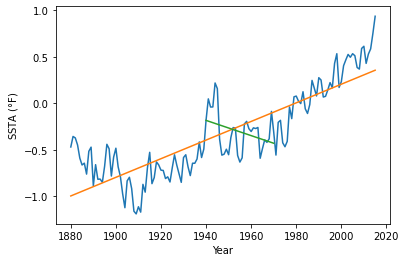

In [114]:
plt.plot(sst_ds.Year, sst_ds["Annual anomaly"])
plt.plot(sst_ds.Year, ssta_trend_entire.slope*sst_ds.Year + ssta_trend_entire.intercept)
plt.plot(sst_ds.Year[60:91], SSTA_40_70.slope*sst_ds.Year[60:91] + SSTA_40_70.intercept)
plt.xlabel('Year')
plt.ylabel('SSTA ($\degree$F)')

In [115]:
SSTA_40_70.slope

-0.008184913548387096

In [116]:
SSTA_40_70.rvalue

-0.33625811590031707

In [117]:
ssta_trend_entire.slope

0.010013503267496782

In [118]:
ssta_trend_entire.rvalue

0.8362694544139663

There is a negative trend between 1940 and 1970, so it shows a decline of temperature and the slope  about -.008. I don't feel super condifednt about the tren because the rvalue is about -.336. Compared to the positive trend which shows and increase in temperature with an rvalue of 0.836. 

**E.6** According to the internet, what might have caused this decline in SST during this perioud? Write a few sentances explaining this and cite your sources here.

According to the article "From A Dimmer Past to a Brighter Future" the cooling period was due to nature variability but also to aerosols. Aerosols causea a cooling effect because the particles absorb incoming sunlight. Specifically after World War II when production increase and the burning of fossil fuels produce soot and light-colored sulfate aerosols.

    1.Brahic, C. Climate myths: The cooling after 1940 shows CO<SUB>2</SUB> does not cause warming. New Scientist https://www.newscientist.com/article/dn11639-climate-myths-the-cooling-after-1940-shows-co2-does-not-cause-warming/.
  



**E.7** Detrend from 1970 on and plot your result. Compare this to an ENSO (El Nino) index and speculate on what may have caused this interannual variability. How does ENSO affect SST and why?

In [119]:
ssta_70 = stats.linregress(sst_ds.Year[90:], sst_ds["Annual anomaly"][90:])
trend_1970_on = ssta_70.slope*sst_ds.Year + ssta_70.intercept

In [121]:
ssta_detrend_70 = sst_ds["Annual anomaly"][90:] - trend_1970_on

([<matplotlib.axis.XTick at 0x2561f5b7e50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

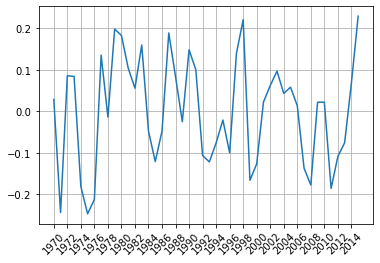

In [129]:
plt.plot(sst_ds.Year[90:], ssta_detrend_70)
plt.grid()
plt.xticks(np.arange(1970,2015,2),rotation=45)## rotation is to make the numbers look better

The detrend shows higher variability between each year, I think year by year there might have been changes due to a combinations between natural cycles and human emissions. ENSO affects SST by having warm and cool events in relationship to atmospheric pressure. 

**E.8** (Advanced) Perform a five year moving average of your detrended data from E.7. Explain your result in relation to the periodicity of ENSO.

In [125]:
ssta_filtered_70 = np.zeros(46)

In [126]:
for i in range(41): 
    ssta_filtered_70[i] = (ssta_detrend_70[i] + ssta_detrend_70[i+1] + ssta_detrend_70[i+2] + ssta_detrend_70[i-2] + ssta_detrend_70[i-1])/5

([<matplotlib.axis.XTick at 0x2561f4e6250>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

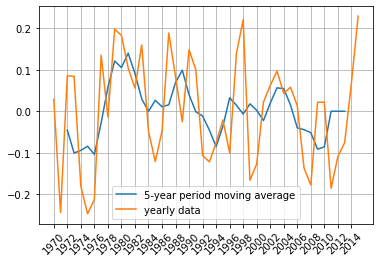

In [127]:
plt.plot(sst_ds.Year[92:-2], ssta_filtered_70[2:-2], label = "5-year period moving average")
plt.plot(sst_ds.Year[90:], ssta_detrend_70, label ="yearly data")
plt.legend()
plt.grid()
plt.xticks(np.arange(1970,2015,2),rotation=45)

The results show that the averages follow the yearly data and highlights the combined cool and warm periods. The 5 year average cleary shows the slow increase in temperature after the 1970s. 